In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

In [11]:
data = pd.read_csv("data.csv", index_col=0)
data

,X1,X2
1,1.6,0.7
2,0.2,0.2
3,0.9,0.6
4,1.8,1.9
5,0.2,1.9
6,0.1,1.2
7,1.8,0.6
8,0.8,0.9
9,0.7,0.3
10,1.3,0.2


In [12]:
data_numpy = data.to_numpy()
# data_numpy

### a. 將10比資料點化在（x,y）座標圖上，並描述其聚類情況

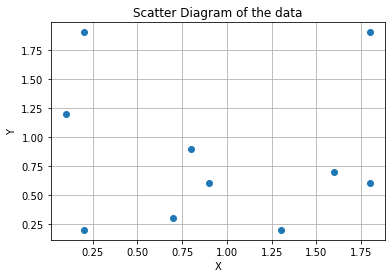

In [13]:
plt.title("Scatter Diagram of the data")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(data_numpy[:,0],
            data_numpy[:,1])
plt.grid(True)
plt.show()

centroids:[[0.78       0.44      ]
 [0.15       1.55      ]
 [1.73333333 1.06666667]]


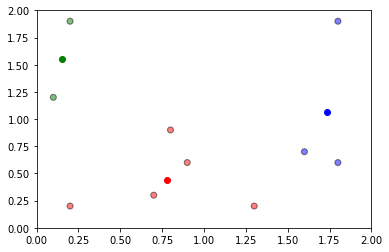

In [14]:
from sklearn.cluster import KMeans

AMOUNT_OF_CENTERS = 3
kmeans = KMeans(n_clusters=AMOUNT_OF_CENTERS)
kmeans.fit(data)

labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_
print(f'centroids:{centroids}')
fig = plt.figure()

# 宣告 colmap
colmap = {1:'r', 2:'g', 3:'b', 4:'c', 5:'y'}
colors = map(lambda x: colmap[x+1], labels)

plt.scatter(data['X1'], data['X2'], color=list(colors), alpha=0.5, edgecolors='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.show()

In [15]:
initial_weights = pd.read_csv("initial_weights.csv", index_col=0)
history_weights = initial_weights
initial_weights

,X1,X2
1,1.1,1.2
2,1.3,1.4
3,0.8,1.2
4,0.5,0.3
5,1.6,0.9
6,1.1,1.8
7,0.6,0.9
8,0.2,1.8
9,1.3,0.5


In [16]:
initial_weights_nparray = initial_weights.to_numpy()

model_weights = initial_weights_nparray

### b. 初始權重在（x,y）座標圖上之分布情形

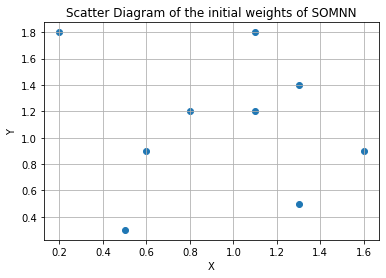

In [17]:
plt.title("Scatter Diagram of the initial weights of SOMNN")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(initial_weights_nparray[:,0],
            initial_weights_nparray[:,1])
plt.grid(True)
plt.show()


### c.
* 若網路之學習速率為1.0、初始鄰近半徑為2.0，
並採逐例學習，當第一個資料點（1.6,0.7）代入網路學習時，
請找出網路之優勝神經元，並計算各神經元之權重改變量。

In [18]:
from numpy.linalg import norm

# learning rate
lr = 1.0

# radius of neighborhood
radius = 2.0

# constant
tau_1 = 1000/np.log(radius)

k = 1
def R(k):
    return radius*np.exp(-k/tau_1)

def eta(k):
    return lr*np.exp(-k/1000)   # tau_2 = 1000

for_plt = []
for_plt.append(model_weights)

for x in range(len(data_numpy)):
    # Find the winner neuron
    shortest_distance = np.inf
    for i in range(len(model_weights)):
        distance = np.linalg.norm(data_numpy[x]-model_weights[i])
        if(distance < shortest_distance):
            shortest_distance = distance
            q = i
    #print(f'the winner node is {q}')

    # updating model weights
    for j in range(len(model_weights)):
        # compute neighborhood function
        term = -(model_weights[j]-model_weights[q])**2/2*R(k)**2
        h = np.exp(term)

        model_weights[j] += eta(k)*h*(data_numpy[x]-model_weights[j])
        model_weights[j] = np.round_(model_weights[j],6)

    for_plt.append(copy.deepcopy(model_weights))
    history_weights["Iterations {0}".format(x)] = model_weights.tolist()

In [19]:
for_plt[1] - for_plt[0]

array([[ 0.102866,  0.582577],
       [ 0.197603,  0.773452],
       [-0.338825,  0.580571],
       [-0.393914,  0.292593],
       [ 0.285603,  0.410133],
       [ 0.089374,  0.609873],
       [-0.206221,  0.422647],
       [-0.715405,  1.328345],
       [ 0.23163 ,  0.408221]])

### d. 將其餘的資料點代入網路，計算網路各神經元之權重改變量。

In [20]:
history_weights

,X1,X2,Iterations 0,Iterations 1,Iterations 2,Iterations 3,Iterations 4,Iterations 5,Iterations 6,Iterations 7,Iterations 8,Iterations 9
1,1.300306,0.200101,"[1.403172, 0.782678]","[1.073845, 0.289435]","[0.900174, 0.59969]","[1.765531, 0.788595]","[1.701538, 0.909733]","[1.662574, 1.174533]","[1.78838, 0.645858]","[1.7693, 0.899652]","[1.605988, 0.300599]","[1.300306, 0.200101]"
2,1.352790,0.202107,"[1.550393, 0.975559]","[1.329931, 0.487335]","[1.032924, 0.597085]","[1.79919, 0.78444]","[1.74417, 0.90392]","[1.712574, 1.175345]","[1.788952, 0.646272]","[1.769922, 0.899658]","[1.606908, 0.300599]","[1.35279, 0.202107]"
3,1.361427,0.202107,"[1.022602, 0.782678]","[0.449265, 0.289435]","[0.749272, 0.545426]","[1.637734, 0.703533]","[1.529231, 0.793403]","[1.445448, 1.192044]","[1.7996, 0.65526]","[1.781486, 0.899747]","[1.623975, 0.300599]","[1.361427, 0.202107]"
4,0.991958,0.202107,"[0.598044, 0.4947]","[0.200398, 0.200295]","[0.463225, 0.490659]","[1.153231, 0.620993]","[0.7466, 0.68611]","[0.284049, 1.199376]","[0.382698, 0.659498]","[0.799583, 0.89976]","[0.7001, 0.300599]","[0.991958, 0.202107]"
5,1.314397,0.290067,"[1.6, 0.7002]","[1.572037, 0.396849]","[1.299503, 0.583787]","[1.735768, 0.763342]","[1.662932, 0.874604]","[1.616146, 1.179715]","[1.790359, 0.648535]","[1.651075, 0.869997]","[1.494991, 0.571995]","[1.314397, 0.290067]"
6,1.313798,1.091997,"[1.403172, 1.70187]","[1.336326, 1.685256]","[1.038217, 1.582235]","[1.799239, 1.899682]","[1.744231, 1.899998]","[1.712645, 1.861246]","[1.788955, 1.60184]","[1.649094, 1.339868]","[1.49216, 1.219725]","[1.313798, 1.091997]"
7,0.941796,0.292864,"[0.735575, 0.715511]","[0.433612, 0.41243]","[0.73526, 0.587138]","[0.846148, 0.62916]","[0.337678, 0.696481]","[0.100238, 1.199497]","[0.144051, 0.65957]","[0.421831, 0.873619]","[0.659904, 0.576191]","[0.941796, 0.292864]"
8,0.943306,0.373525,"[0.227901, 1.70187]","[0.20007, 1.685256]","[0.462779, 1.582235]","[0.500494, 1.84181]","[0.2003, 1.899942]","[0.102084, 1.637479]","[0.146288, 1.209873]","[0.424744, 0.954407]","[0.661084, 0.676028]","[0.943306, 0.373525]"
9,1.318763,0.276209,"[1.550393, 0.68443]","[1.514975, 0.381395]","[1.226194, 0.579955]","[1.523702, 0.620641]","[1.483687, 0.66928]","[1.453454, 0.971681]","[1.799654, 0.600371]","[1.664164, 0.850637]","[1.513659, 0.550022]","[1.318763, 0.276209]"


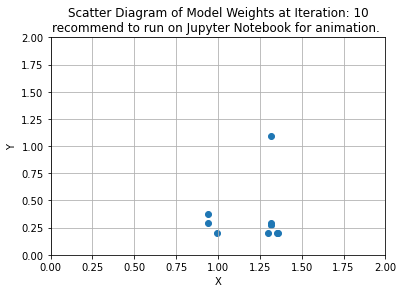

In [21]:
from IPython import display
%matplotlib inline

fig = plt.figure()
# plt.ion()

for index in range(len(for_plt)):
    fig.clf()
    plt.title(f"Scatter Diagram of Model Weights at Iteration: {index}\nrecommend to run on Jupyter Notebook for animation. ")

    plt.scatter(for_plt[index][:,0],
                for_plt[index][:,1])

    # np.set_printoptions(precision=8)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(0,2)
    plt.ylim(0,2)
    plt.grid(True)

    display.clear_output(wait=True)
    plt.pause(0.4)

# plt.ioff()

plt.show()